In [ ]:
!wget https://raw.githubusercontent.com/Huangxiaojie2024/InterDIA/refs/heads/main/DataSet/DIA_testset_RDKit_descriptors.csv
!wget https://raw.githubusercontent.com/Huangxiaojie2024/InterDIA/refs/heads/main/DataSet/DIA_trainingset_RDKit_descriptors.csv

In [1]:
import pandas as pd

In [2]:
# 1.1 Load training dataset
training_set = pd.read_csv("DIA_trainingset_RDKit_descriptors.csv")
training_set

,Label,SMILES,BalabanJ,BertzCT,Chi0,Chi0n,Chi0v,Chi1,Chi1n,Chi1v,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0,COC(=O)N(C)c1c(N)nc(nc1N)c2nn(Cc3ccccc3F)c4ncc...,1.821,1266.407,22.121,16.781,16.781,14.901,9.203,9.203,...,0,0,0,0,0,0,0,0,0,0
1,0,C[C@H](N(O)C(=O)N)c1cc2ccccc2s1,2.363,490.434,11.707,8.752,9.569,7.592,4.854,5.670,...,0,0,0,0,0,0,0,1,0,1
2,0,C[N+](C)(C)CC(=O)[O-],3.551,93.092,6.784,5.471,5.471,3.417,2.420,2.420,...,0,0,0,0,0,0,0,0,0,0
3,1,CC(C)n1c(\C=C\[C@H](O)C[C@H](O)CC(=O)O)c(c2ccc...,2.076,1053.003,21.836,16.995,16.995,14.274,9.926,9.926,...,0,0,0,0,0,0,0,0,0,0
4,1,C\C(=C(\C#N)/C(=O)Nc1ccc(cc1)C(F)(F)F)\O,2.888,549.823,14.629,9.746,9.746,8.752,5.040,5.040,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472,0,C(C1=NCCN1)c2cccc3ccccc23,2.022,537.932,10.795,9.110,9.110,7.933,5.672,5.672,...,0,0,0,0,0,0,0,0,0,0
473,0,C[N@+]1(CC2CC2)CC[C@]34[C@H]5Oc6c(O)ccc(C[C@@H...,1.602,848.658,17.897,15.202,15.202,12.389,10.003,10.003,...,0,0,0,0,0,0,0,0,0,0
474,1,CO\N=C(/C(=O)N[C@H]1[C@H]2SCC(=C(N2C1=O)C(=O)O...,1.766,910.031,21.129,14.986,15.802,13.845,8.129,9.178,...,1,0,0,0,0,0,0,0,0,0
475,0,Clc1ccc(CO\N=C(\Cn2ccnc2)/c3ccc(Cl)cc3Cl)c(Cl)c1,1.831,926.191,18.518,13.372,16.396,12.525,7.566,9.078,...,0,0,0,0,0,0,0,0,0,0


In [3]:
Xtrain = training_set.iloc[:, 2:]
Ytrain = training_set.iloc[:, 0]

# Display label distribution
print(Ytrain.value_counts())

Label
0    359
1    118
Name: count, dtype: int64


In [4]:
# 1.2 Load test dataset
test_set = pd.read_csv("DIA_testset_RDKit_descriptors.csv")
test_set

,Label,SMILES,BalabanJ,BertzCT,Chi0,Chi0n,Chi0v,Chi1,Chi1n,Chi1v,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0,C[C@H](\C=C\[C@H](O)C1CC1)[C@@H]2CC[C@@H]3\C(=...,1.484,743.207,21.466,18.764,18.764,14.292,12.106,12.106,...,0,0,0,0,0,0,0,0,0,0
1,1,OCCN1CCN(CCCN2c3ccccc3Sc4ccc(cc24)C(F)(F)F)CC1,1.472,868.947,21.140,16.736,17.553,14.453,10.268,11.084,...,0,0,0,0,0,0,0,0,0,0
2,0,C[C@@H]1O[C@H](C[C@H](O)[C@@H]1O)O[C@@H]2[C@H]...,0.837,1409.004,39.189,32.904,32.904,26.011,20.941,20.941,...,0,0,0,0,0,0,0,0,0,0
3,1,NC(=O)Cc1cccc(C(=O)c2ccccc2)c1N,2.406,621.298,13.828,10.297,10.297,9.092,5.847,5.847,...,0,0,0,0,0,0,0,0,0,0
4,0,COc1cc2c(CCN[C@]23CS[C@@H]4[C@@H]5[C@@H]6N(C)[...,1.320,2127.996,37.955,30.849,31.666,25.910,18.066,19.115,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0,CCN1CCN(C(=O)N[C@H](C(=O)N[C@@H]2[C@@H]3SC(C)(...,1.508,1127.109,26.361,19.925,20.742,16.973,11.450,12.330,...,1,0,0,0,0,0,0,0,0,1
116,0,CC1=C(C=C(C#N)C(=O)N1)c2ccncc2,2.678,608.396,11.544,8.689,8.689,7.720,4.765,4.765,...,0,0,0,0,0,0,0,0,0,0
117,0,CCCN(CCc1cccs1)[C@@H]2CCc3c(O)cccc3C2,1.670,593.488,15.364,13.294,14.110,10.775,8.338,9.217,...,0,0,0,0,0,0,0,1,0,0
118,0,COCCOC(=O)C1=C(C)NC(=C([C@@H]1c2cccc(c2)[N+](=...,2.603,902.371,22.422,17.683,17.683,14.167,9.469,9.469,...,0,0,0,0,0,0,0,0,1,0


In [5]:
Xtest = test_set.iloc[:, 2:]
Ytest = test_set.iloc[:, 0]

In [6]:
# Display label distribution
print(Ytest.value_counts())

Label
0    90
1    30
Name: count, dtype: int64


In [7]:
# 2. Feature preprocessing pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
import numpy as np
import joblib

def preprocess_features(X_train, X_test):
    """
    Preprocess features: standardization, variance threshold, correlation filtering

    Args:
        X_train (pd.DataFrame): Training features
        X_test (pd.DataFrame): Test features

    Returns:
        X_train_processed, X_test_processed (pd.DataFrame)
    """
    # 2.1. Check missing values
    print("\nMissing values:")
    print("Training set:", X_train.isnull().sum().sum())
    print("Test set:", X_test.isnull().sum().sum())

    # 2.2. Standardization
    scaler = StandardScaler()
    X_train_std = pd.DataFrame(
        scaler.fit_transform(X_train),
        columns=X_train.columns,
        index=X_train.index
    )
    X_test_std = pd.DataFrame(
        scaler.transform(X_test),
        columns=X_test.columns,
        index=X_test.index
    )
    joblib.dump(scaler, 'scaler.pkl')  # Save the scaler for reproducibility

    # 2.3. Remove zero-variance features
    selector = VarianceThreshold()
    selector.fit(X_train_std)
    keep_vars = X_train.columns[selector.variances_ != 0].tolist()

    X_train_var = X_train_std[keep_vars]
    X_test_var = X_test_std[keep_vars]

    # 2.4. Remove highly correlated features
    corr_matrix = X_train_var.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    drop_features = [column for column in upper.columns if any(upper[column] > 0.9)]

    X_train_processed = X_train_var.drop(columns=drop_features)
    X_test_processed = X_test_var.drop(columns=drop_features)

    print(f"\nFeatures reduced from {X_train.shape[1]} to {X_train_processed.shape[1]}")

    # Save processed features
    X_train_processed.to_csv("X_train_processed2.csv", index=False)
    X_test_processed.to_csv("X_test_processed2.csv", index=False)

    return X_train_processed, X_test_processed


In [8]:
# Preprocess features
X_train_processed, X_test_processed = preprocess_features(Xtrain, Xtest)


Missing values:
Training set: 0
Test set: 0

Features reduced from 196 to 140


In [9]:
X_train_processed

,BalabanJ,BertzCT,Chi0,EState_VSA1,EState_VSA10,EState_VSA11,EState_VSA2,EState_VSA3,EState_VSA4,EState_VSA5,...,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea
0,-0.452875,1.344465,0.551264,-0.525136,-0.384981,-0.181361,1.395076,0.554831,-0.812459,0.507059,...,-0.146333,-0.222670,-0.204792,-0.122039,-0.079556,-0.09196,-0.168934,-0.155535,-0.238492,-0.167384
1,0.310322,-0.632257,-0.887194,-0.263887,-0.305248,-0.181361,-1.140124,-0.755872,-0.247407,-0.915263,...,-0.146333,-0.222670,-0.204792,-0.122039,-0.079556,-0.09196,-0.168934,5.551415,-0.238492,5.974304
2,1.983159,-1.644450,-1.567194,-0.530553,-0.315105,-0.181361,-0.672837,-0.799998,-1.087602,-0.915263,...,6.833740,-0.222670,-0.204792,-0.122039,-0.079556,-0.09196,-0.168934,-0.155535,-0.238492,-0.167384
3,-0.093806,0.800838,0.511898,0.283293,0.611727,-0.181361,0.164995,-1.141063,0.469142,-0.061968,...,-0.146333,-0.222670,-0.204792,-0.122039,-0.079556,-0.09196,-0.168934,-0.155535,-0.238492,-0.167384
4,1.049581,-0.480968,-0.483586,0.474686,0.471975,-0.181361,-0.734095,-1.141063,0.663707,-0.488440,...,-0.146333,-0.222670,-0.204792,-0.122039,-0.079556,-0.09196,-0.168934,-0.155535,-0.238492,-0.167384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472,-0.169844,-0.511260,-1.013166,-0.791321,-1.281364,-0.181361,-1.140124,-1.141063,0.335614,0.233622,...,-0.146333,-0.222670,-0.204792,-0.122039,-0.079556,-0.09196,-0.168934,-0.155535,-0.238492,-0.167384
473,-0.761251,0.280287,-0.032186,-0.043399,0.183298,-0.181361,0.114661,0.273335,1.577292,-0.012105,...,6.833740,-0.222670,-0.204792,-0.122039,-0.079556,-0.09196,-0.168934,-0.155535,-0.238492,-0.167384
474,-0.530321,0.436629,0.414242,0.750526,1.088659,-0.181361,1.366018,-1.141063,-0.812459,1.279054,...,-0.146333,3.862468,-0.204792,-0.122039,-0.079556,-0.09196,-0.168934,-0.155535,-0.238492,-0.167384
475,-0.438794,0.477795,0.053591,-0.791321,-1.281364,-0.181361,-0.668410,1.319889,-0.462804,-0.915263,...,-0.146333,-0.222670,-0.204792,-0.122039,-0.079556,-0.09196,-0.168934,-0.155535,-0.238492,-0.167384


In [10]:
"""
Step 3: Hyperparameter Optimization and Feature Selection for Balanced Random Forest

This script performs hyperparameter optimization for Balanced Random Forest Classifier
on preprocessed features, followed by feature selection based on the optimized model.

Process:
1. Load preprocessed features (X_train_processed) and labels (Ytrain)
2. Optimize hyperparameters using Hyperopt with MCC as objective
3. Train model with best parameters for subsequent feature selection
"""

'\nStep 3: Hyperparameter Optimization and Feature Selection for Balanced Random Forest\n\nThis script performs hyperparameter optimization for Balanced Random Forest Classifier\non preprocessed features, followed by feature selection based on the optimized model.\n\nProcess:\n1. Load preprocessed features (X_train_processed) and labels (Ytrain)\n2. Optimize hyperparameters using Hyperopt with MCC as objective\n3. Train model with best parameters for subsequent feature selection\n'

In [11]:
%pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [12]:
%pip install hyperopt

Note: you may need to restart the kernel to use updated packages.


In [13]:
import sklearn
import imblearn

print("scikit-learn:", sklearn.__version__)
print("imbalanced-learn:", imblearn.__version__)

scikit-learn: 1.6.1
imbalanced-learn: 0.13.0


In [14]:

import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, matthews_corrcoef
from imblearn.ensemble import BalancedRandomForestClassifier
from hyperopt import hp, fmin, tpe, Trials
from hyperopt.early_stop import no_progress_loss
from sklearn.model_selection import cross_validate, cross_val_score

def get_model_performance(X, y, model_params, random_state=1):
   """Get CV and OOF performance metrics for a model"""
   model = BalancedRandomForestClassifier(**model_params)
   cv = KFold(n_splits=10, shuffle=True, random_state=random_state)
   cv_metrics = []

   # Get CV metrics
   for train_idx, val_idx in cv.split(X):
       X_train_fold = X.iloc[train_idx]
       X_val_fold = X.iloc[val_idx]
       y_train_fold = y.iloc[train_idx]
       y_val_fold = y.iloc[val_idx]

       model.fit(X_train_fold, y_train_fold)
       y_pred = model.predict(X_val_fold)
       y_pred_proba = model.predict_proba(X_val_fold)[:, 1]

       tn, fp, fn, tp = confusion_matrix(y_val_fold, y_pred).ravel()
       metrics = {
           'AUC': roc_auc_score(y_val_fold, y_pred_proba),
           'ACC': accuracy_score(y_val_fold, y_pred),
           'SEN': tp / (tp + fn),
           'SPE': tn / (tn + fp),
           'MCC': matthews_corrcoef(y_val_fold, y_pred)
       }
       cv_metrics.append(metrics)
       print(f"Fold {len(cv_metrics)}: {metrics}")

   cv_mean = {m: np.mean([fold[m] for fold in cv_metrics]) for m in cv_metrics[0].keys()}

   # Get OOF predictions
   y_pred_all = np.zeros_like(y)
   y_pred_proba_all = np.zeros_like(y, dtype=float)

   for train_idx, val_idx in cv.split(X):
       X_train_fold = X.iloc[train_idx]
       X_val_fold = X.iloc[val_idx]
       y_train_fold = y.iloc[train_idx]

       model.fit(X_train_fold, y_train_fold)
       y_pred_all[val_idx] = model.predict(X_val_fold)
       y_pred_proba_all[val_idx] = model.predict_proba(X_val_fold)[:, 1]
       print(f"Fold {len(cv_metrics)}: {metrics}")

   # Calculate OOF metrics
   tn, fp, fn, tp = confusion_matrix(y, y_pred_all).ravel()
   oof_metrics = {
       'AUC': roc_auc_score(y, y_pred_proba_all),
       'ACC': accuracy_score(y, y_pred_all),
       'SEN': tp / (tp + fn),
       'SPE': tn / (tn + fp),
       'MCC': matthews_corrcoef(y, y_pred_all)
   }

   # Create results table
   metrics_order = ['AUC', 'ACC', 'SEN', 'SPE', 'MCC']
   results = pd.DataFrame({
       'Metric': metrics_order,
       'CV Mean': [cv_mean[m] for m in metrics_order],
       'Out-of-fold': [oof_metrics[m] for m in metrics_order]
   })

   return results

def optimize_brf(X, y, random_state=1):
    def objective(params):
        model = BalancedRandomForestClassifier(
            n_estimators=int(params["n_estimators"]),
            criterion=params["criterion"],
            max_depth=int(params["max_depth"]),
            max_features=params["max_features"],
            sampling_strategy='auto',
            replacement=False,
            random_state=random_state,
            n_jobs=-1
        )
        cv = KFold(n_splits=10, shuffle=True, random_state=random_state)
        scores = cross_validate(
            model, X, y,
            cv=cv,
            scoring="matthews_corrcoef",
            n_jobs=-1,
            error_score="raise"
        )
        return -np.mean(scores["test_score"])

    max_features_choices = ["sqrt", "log2"] + list(range(10, 70))
    param_space = {
        'n_estimators': hp.quniform("n_estimators", 40, 300, 1),
        'criterion': hp.choice("criterion", ["gini", "entropy"]),
        'max_depth': hp.quniform('max_depth', 1, 25, 1),
        'max_features': hp.choice("max_features", max_features_choices)
    }

    trials = Trials()
    best_params = fmin(
        fn=objective,
        space=param_space,
        algo=tpe.suggest,
        max_evals=10,
        trials=trials,
        early_stop_fn=no_progress_loss(400),
        verbose=True
    )

    # Convert parameters to correct types
    best_params = {
        "n_estimators": int(best_params["n_estimators"]),
        "criterion": ["gini", "entropy"][best_params["criterion"]],
        "max_depth": int(best_params["max_depth"]),
        "max_features": max_features_choices[best_params["max_features"]],
        "bootstrap": True,
        "sampling_strategy": 'auto',
        "replacement": False,
        "random_state": random_state,
        "verbose": False,
        "n_jobs": -1
    }

    return best_params

In [15]:
"""
# Run optimization and evaluation
best_params = optimize_brf(X_train_processed, Ytrain)
results = get_model_performance(X_train_processed, Ytrain, best_params)
print("\nBest Parameters:", best_params)
print("\nModel Performance:")
print(results.to_string(index=False, float_format='%.4f'))
"""

'\n# Run optimization and evaluation\nbest_params = optimize_brf(X_train_processed, Ytrain)\nresults = get_model_performance(X_train_processed, Ytrain, best_params)\nprint("\nBest Parameters:", best_params)\nprint("\nModel Performance:")\nprint(results.to_string(index=False, float_format=\'%.4f\'))\n'

In [16]:
# Define best parameters for feature processing
best_params = {
   'n_estimators': 255,
   'criterion': 'gini',
   'max_depth': 16,
   'max_features': 30,
   'bootstrap': True,
   'sampling_strategy': 'auto',
   'replacement': False,
   'random_state': 1,
   'verbose': False,
   'n_jobs': -1
}
# Get model performance
results = get_model_performance(X_train_processed, Ytrain, best_params)
print("\nModel Performance:")
print(results.to_string(index=False, float_format='%.4f'))

Fold 1: {'AUC': np.float64(0.8197368421052632), 'ACC': 0.7291666666666666, 'SEN': np.float64(0.7), 'SPE': np.float64(0.7368421052631579), 'MCC': np.float64(0.37094624751558053)}
Fold 2: {'AUC': np.float64(0.8955773955773956), 'ACC': 0.875, 'SEN': np.float64(0.9090909090909091), 'SPE': np.float64(0.8648648648648649), 'MCC': np.float64(0.7017957756349983)}
Fold 3: {'AUC': np.float64(0.9186813186813186), 'ACC': 0.8125, 'SEN': np.float64(0.8461538461538461), 'SPE': np.float64(0.8), 'MCC': np.float64(0.5931229820154263)}
Fold 4: {'AUC': np.float64(0.8835164835164835), 'ACC': 0.7083333333333334, 'SEN': np.float64(0.9230769230769231), 'SPE': np.float64(0.6285714285714286), 'MCC': np.float64(0.49072038662559775)}
Fold 5: {'AUC': np.float64(0.8912087912087912), 'ACC': 0.8125, 'SEN': np.float64(0.7692307692307693), 'SPE': np.float64(0.8285714285714286), 'MCC': np.float64(0.5635445125120265)}
Fold 6: {'AUC': np.float64(0.8648648648648649), 'ACC': 0.7916666666666666, 'SEN': np.float64(0.8181818181

In [17]:
# best model from preprocessing
best_model_preprocessing = BalancedRandomForestClassifier(
   n_estimators=255,
   criterion='gini',
   max_depth=16,
   max_features=30,
   bootstrap=True,
   sampling_strategy='auto',
   replacement=False,
   random_state=1,
   verbose=False,
   n_jobs=-1
)
best_model_preprocessing.fit(X_train_processed,Ytrain)

BalancedRandomForestClassifier(bootstrap=True, max_depth=16, max_features=30,
                               n_estimators=255, n_jobs=-1, random_state=1,
                               replacement=False, sampling_strategy='auto',
                               verbose=False)

In [18]:
"""
Step 4: Feature Selection Methods

This script implements four different feature selection methods:
1. Mutual Information (MI)
2. Embedded tree-based feature selection (ETB)
3. Recursive Feature Elimination with Cross-Validation (RFECV)
4. Genetic Algorithm (GA)

Note: Only GA results will be demonstrated; other methods are provided as code templates.
"""

'\nStep 4: Feature Selection Methods\n\nThis script implements four different feature selection methods:\n1. Mutual Information (MI)\n2. Embedded tree-based feature selection (ETB)\n3. Recursive Feature Elimination with Cross-Validation (RFECV)\n4. Genetic Algorithm (GA)\n\nNote: Only GA results will be demonstrated; other methods are provided as code templates.\n'

In [19]:
# 4.1 Mutual Information Selection

from sklearn.feature_selection import mutual_info_classif as MIC, SelectKBest

def mutual_information_selection(X, y, random_state=0):
    """
    Mutual Information based feature selection
    """
    np.random.seed(random_state)

    # Calculate mutual information scores
    mi_scores = MIC(X, y)

    # Get number of features with MI > 0
    k = mi_scores.shape[0] - sum(mi_scores <= 0)

    # Select top k features
    selector = SelectKBest(MIC, k=k)
    selector.fit(X, y)

    # Get selected feature names and scores
    feature_scores = pd.Series(mi_scores, index=X.columns)
    selected_features = feature_scores[feature_scores > 0].index.tolist()

    # Sort and return scores
    feature_scores_sorted = feature_scores.sort_values(ascending=False)

    return selected_features, feature_scores_sorted, selector

# Example usage:
"""
selected_features_mi, mi_scores, mi_selector = mutual_information_selection(
    X_train_processed, Ytrain)
print(f"Number of selected features: {len(selected_features_mi)}")
print("\nTop 10 features by MI score:")
print(mi_scores.head(10))

# Get transformed dataset with selected features
X_train_mi = X_train_processed[selected_features_mi]

# Optimize hyperparameters for MI-selected features
best_params_mi = optimize_brf(X_train_mi, Ytrain)
print("\nBest parameters for MI-selected features:", best_params_mi)

# Evaluate performance with MI-selected features
results_mi = get_model_performance(X_train_mi, Ytrain, best_params_mi)
print("\nModel Performance with MI-selected features:")
print(results_mi.to_string(index=False, float_format='%.4f'))
"""

'\nselected_features_mi, mi_scores, mi_selector = mutual_information_selection(\n    X_train_processed, Ytrain)\nprint(f"Number of selected features: {len(selected_features_mi)}")\nprint("\nTop 10 features by MI score:")\nprint(mi_scores.head(10))\n\n# Get transformed dataset with selected features\nX_train_mi = X_train_processed[selected_features_mi]\n\n# Optimize hyperparameters for MI-selected features\nbest_params_mi = optimize_brf(X_train_mi, Ytrain)\nprint("\nBest parameters for MI-selected features:", best_params_mi)\n\n# Evaluate performance with MI-selected features\nresults_mi = get_model_performance(X_train_mi, Ytrain, best_params_mi)\nprint("\nModel Performance with MI-selected features:")\nprint(results_mi.to_string(index=False, float_format=\'%.4f\'))\n'

In [20]:
# 4.2 Embedded Tree-based Feature Selection (ETB)
# Uses the feature importances from the best model to select significant features


def embedded_feature_selection(model, X, y, importance_threshold=0.001):
   """
   Select features based on importance scores from a tree-based model
   """
   importances = pd.Series(
       model.feature_importances_,
       index=model.feature_names_in_
   ).sort_values(ascending=False)

   mask = model.feature_importances_ > importance_threshold
   selected_features = model.feature_names_in_[mask]
   X_selected = X[selected_features]

   print(f"Selected {len(selected_features)} features with importance > {importance_threshold}")
   return X_selected, importances

"""
# Perform ETB feature selection
X_train_etb, importance_scores = embedded_feature_selection(
   best_model_preprocessing, X_train_processed, Ytrain)

# Optimize hyperparameters for ETB-selected features
best_params_etb = optimize_brf(X_train_etb, Ytrain)
print("\nBest parameters for ETB-selected features:", best_params_etb)


# Evaluate performance
results_etb = get_model_performance(X_train_etb, Ytrain, best_params_etb)
print("\nModel Performance with ETB-selected features:")
print(results_etb.to_string(index=False, float_format='%.4f'))
"""

'\n# Perform ETB feature selection\nX_train_etb, importance_scores = embedded_feature_selection(\n   best_model_preprocessing, X_train_processed, Ytrain)\n\n# Optimize hyperparameters for ETB-selected features\nbest_params_etb = optimize_brf(X_train_etb, Ytrain)\nprint("\nBest parameters for ETB-selected features:", best_params_etb)\n\n\n# Evaluate performance\nresults_etb = get_model_performance(X_train_etb, Ytrain, best_params_etb)\nprint("\nModel Performance with ETB-selected features:")\nprint(results_etb.to_string(index=False, float_format=\'%.4f\'))\n'

In [21]:
# 4.3 RFECV
def rfecv_selection(X, y, cv=10):
   rfecv = RFECV(
       estimator=best_model_preprocessing,
       step=1,
       cv=cv,
       scoring="matthews_corrcoef"
   ).fit(X, y)

   selected_features = rfecv.get_feature_names_out()
   X_selected = X[selected_features]

   print(f"Optimal number of features: {rfecv.n_features_}")
   return X_selected, selected_features, rfecv

"""
# Run RFECV selection
X_train_rfecv, selected_features_rfecv, rfecv_selector = rfecv_selection(
   X_train_processed, Ytrain)

# Optimize hyperparameters
best_params_rfecv = optimize_brf(X_train_rfecv, Ytrain)
print("\nBest parameters for RFECV-selected features:", best_params_rfecv)


# Evaluate performance
results_rfecv = get_model_performance(X_train_rfecv, Ytrain, best_params_rfecv)
print("\nModel Performance with RFECV-selected features:")
print(results_rfecv.to_string(index=False, float_format='%.4f'))
"""

'\n# Run RFECV selection\nX_train_rfecv, selected_features_rfecv, rfecv_selector = rfecv_selection(\n   X_train_processed, Ytrain)\n\n# Optimize hyperparameters\nbest_params_rfecv = optimize_brf(X_train_rfecv, Ytrain)\nprint("\nBest parameters for RFECV-selected features:", best_params_rfecv)\n\n\n# Evaluate performance\nresults_rfecv = get_model_performance(X_train_rfecv, Ytrain, best_params_rfecv)\nprint("\nModel Performance with RFECV-selected features:")\nprint(results_rfecv.to_string(index=False, float_format=\'%.4f\'))\n'

In [22]:
!pip install deap

In [ ]:
#4.4 Genetic Algorithm Feature Selection (GA)

import numpy as np
from deap import base, creator, tools, algorithms
from sklearn.metrics import matthews_corrcoef, make_scorer
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.model_selection import cross_val_score
import random

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
random.seed(RANDOM_SEED)

# Replace with your actual data
X_train_df = X_train_processed  # Your training feature DataFrame
y_train_df = Ytrain  # Your training label Series

# Save feature names
feature_names = X_train_df.columns

# Convert to numpy arrays
X_train = X_train_df.values
y_train = y_train_df.values

# Define evaluation function
def evaluate(individual):
   selected_features = [index for index, value in enumerate(individual) if value == 1]
   if not selected_features:
       return -1,  # Return -1 score if no features selected (worst case)
   X_train_selected = X_train[:, selected_features]
   clf = BalancedRandomForestClassifier(
       n_estimators=255,
       criterion="gini",
       max_depth=16,
       max_features=30,
       bootstrap=True,
       sampling_strategy='auto',
       replacement=False,
       random_state=1,
       verbose=False,
       n_jobs=50
   )
   mcc_scorer = make_scorer(matthews_corrcoef)
   scores = cross_val_score(clf, X_train_selected, y_train, cv=5, scoring=mcc_scorer, n_jobs=-1)
   return scores.mean(),

# Set GA parameters
NUM_GENES = X_train.shape[1]  # Number of genes equals number of features
POP_SIZE = 50  # Population size
NGEN = 40     # Number of generations
CXPB = 0.5    # Crossover probability
MUTPB = 0.2   # Mutation probability

# Define genetic algorithm type
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_bool", np.random.randint, 2)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=NUM_GENES)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", evaluate)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

# Elite preservation strategy
hof = tools.HallOfFame(1)

# Generate initial population
population = toolbox.population(n=POP_SIZE)

# Run genetic algorithm
result_population, logbook = algorithms.eaSimple(population, toolbox, cxpb=CXPB, mutpb=MUTPB, ngen=NGEN,
                                              stats=None, halloffame=hof, verbose=True)

# Get best individual
best_individual = hof[0]
selected_features = [index for index, value in enumerate(best_individual) if value == 1]

# Print selected feature names
selected_feature_names = feature_names[selected_features]
print(f"Selected features: {selected_feature_names}")
print(f"Best individual MCC on training set: {evaluate(best_individual)[0]}")

# Train and evaluate model with selected features
X_train_selected = X_train[:, selected_features]

e:\miniconda3\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
e:\miniconda3\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals
0  	50    
1  	26    
2  	29    
3  	28    
4  	26    
5  	32    
6  	18    
7  	31    
8  	30    
9  	28    
10 	28    
11 	17    
12 	33    
13 	30    
14 	31    
15 	26    
16 	28    
17 	33    
18 	33    
19 	24    
20 	20    
21 	26    
22 	39    
23 	23    
24 	37    
25 	29    
26 	35    
27 	35    
28 	33    
29 	23    
30 	34    
31 	26    
32 	22    
33 	27    
34 	31    
35 	36    
36 	24    
37 	37    
38 	26    
39 	29    
40 	19    
Selected features: Index(['Chi0', 'EState_VSA10', 'EState_VSA2', 'EState_VSA5', 'FractionCSP3',
       'HallKierAlpha', 'Ipc', 'MolLogP', 'NHOHCount',
       'NumAliphaticCarbocycles', 'NumAliphaticHeterocycles',
       'NumAliphaticRings', 'NumAromaticHeterocycles', 'PEOE_VSA11',
       'PEOE_VSA8', 'PEOE_VSA9', 'RingCount', 'SMR_VSA2', 'SMR_VSA3',
       'SMR_VSA4', 'SMR_VSA5', 'SMR_VSA7', 'SlogP_VSA10', 'SlogP_VSA11',
       'SlogP_VSA2', 'SlogP_VSA3', 'SlogP_VSA4', 'SlogP_VSA5', 'VSA_EState9',
       'fr_Al_COO', 'fr_Al_OH', 'fr

In [25]:
"""
After getting selected features from GA, optimize model parameters and evaluate performance

# Optimize parameters using selected features
best_params_ga = optimize_brf(X_train_selected, Ytrain)
print("\nBest parameters with GA-selected features:")
print(best_params_ga)

# Evaluate model performance with selected features
results_ga = get_model_performance(X_train_selected, Ytrain, best_params_ga)
print("\nModel Performance with GA-selected features:")
print(results_ga.to_string(index=False, float_format='%.4f'))
"""

'\nAfter getting selected features from GA, optimize model parameters and evaluate performance\n\n# Optimize parameters using selected features\nbest_params_ga = optimize_brf(X_train_selected, Ytrain)\nprint("\nBest parameters with GA-selected features:")\nprint(best_params_ga)\n\n# Evaluate model performance with selected features\nresults_ga = get_model_performance(X_train_selected, Ytrain, best_params_ga)\nprint("\nModel Performance with GA-selected features:")\nprint(results_ga.to_string(index=False, float_format=\'%.4f\'))\n'

In [26]:
# Get selected features for testing set using feature names
X_test_selected = X_test_processed[selected_feature_names]
X_test_selected

,Chi0,EState_VSA10,EState_VSA2,EState_VSA5,FractionCSP3,HallKierAlpha,Ipc,MolLogP,NHOHCount,NumAliphaticCarbocycles,...,fr_nitro_arom_nonortho,fr_oxime,fr_piperdine,fr_priamide,fr_pyridine,fr_sulfide,fr_sulfonamd,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0.460791,0.213746,-0.704323,2.186080,0.841873,0.723430,-0.077297,1.091291,0.376545,2.660794,...,-0.091960,-0.102923,-0.307404,-0.220695,-0.303219,-0.222670,-0.204792,-0.155535,-0.238492,-0.167384
1,0.415761,0.004021,-0.668410,0.765235,-0.109551,0.184829,-0.077298,0.781134,-0.571275,-0.534168,...,-0.091960,-0.102923,-0.307404,-0.220695,-0.303219,-0.222670,-0.204792,-0.155535,-0.238492,-0.167384
2,2.908821,2.176713,3.222955,-0.915263,1.693951,0.621282,0.264547,-0.046743,1.798274,2.660794,...,-0.091960,-0.102923,-0.307404,-0.220695,-0.303219,-0.222670,-0.204792,-0.155535,-0.238492,-0.167384
3,-0.594226,-0.345554,-0.268807,-0.915263,-1.592091,-0.632359,-0.077299,-0.320061,0.850454,-0.534168,...,-0.091960,-0.102923,-0.307404,4.165616,-0.303219,-0.222670,-0.204792,-0.155535,-0.238492,-0.167384
4,2.738372,1.149556,1.890135,1.398894,0.012721,-2.294595,0.306693,0.426613,0.850454,-0.534168,...,-0.091960,-0.102923,-0.307404,-0.220695,-0.303219,3.862468,-0.204792,-0.155535,-0.238492,-0.167384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,1.136924,2.024469,-0.205550,0.601159,-0.021668,-1.551696,-0.077282,-1.549201,-0.097365,-0.534168,...,-0.091960,-0.102923,-0.307404,-0.220695,-0.303219,3.862468,-0.204792,-0.155535,-0.238492,5.974304
116,-0.909708,-0.813410,-0.345986,-0.915263,-1.530955,-0.437348,-0.077299,-0.284807,-0.571275,-0.534168,...,-0.091960,-0.102923,-0.307404,-0.220695,5.851491,-0.222670,-0.204792,-0.155535,-0.238492,-0.167384
117,-0.382062,-0.782961,-1.140124,1.122151,-0.036952,0.574851,-0.077299,0.764497,-0.571275,0.264572,...,-0.091960,-0.102923,-0.307404,-0.220695,-0.303219,-0.222670,-0.204792,5.551415,-0.238492,-0.167384
118,0.592840,0.641492,1.440912,0.864679,-0.208896,-1.170961,-0.077298,0.251530,-0.571275,-0.534168,...,10.874282,-0.102923,-0.307404,-0.220695,-0.303219,-0.222670,-0.204792,-0.155535,0.490743,-0.167384


In [27]:
"""
5. Model Development and Evaluation

Note: RDKit_GA_65 represents the optimal molecular descriptor set. We constructed and optimized
5 models using these selected features and validated them with an external test set.
Due to the tedious nature of parameter optimization, we directly provide the optimal parameters
for each machine learning algorithm based on our experimental results.

The following codes include:
1. Parameter optimization code templates for all 5 models:
  - Balanced Random Forest (BRF)
  - Easy Ensemble Classifier (EEC)
  - XGBoost with Balanced Bagging (BBC+XGBoost)
  - Gradient Boosting with Balanced Bagging (BBC+GBDT)
  - LightGBM with Balanced Bagging (BBC+LightGBM)

2. Model evaluation using best parameters:
  - 10-fold cross-validation performance
  - Out-of-fold performance
  - External test set performance
  - ROC curve comparison
"""

'\n5. Model Development and Evaluation\n\nNote: RDKit_GA_65 represents the optimal molecular descriptor set. We constructed and optimized\n5 models using these selected features and validated them with an external test set.\nDue to the tedious nature of parameter optimization, we directly provide the optimal parameters\nfor each machine learning algorithm based on our experimental results.\n\nThe following codes include:\n1. Parameter optimization code templates for all 5 models:\n  - Balanced Random Forest (BRF)\n  - Easy Ensemble Classifier (EEC)\n  - XGBoost with Balanced Bagging (BBC+XGBoost)\n  - Gradient Boosting with Balanced Bagging (BBC+GBDT)\n  - LightGBM with Balanced Bagging (BBC+LightGBM)\n\n2. Model evaluation using best parameters:\n  - 10-fold cross-validation performance\n  - Out-of-fold performance\n  - External test set performance\n  - ROC curve comparison\n'

In [28]:
def evaluate_model_performance(model, X_train, y_train, X_test, y_test):
   """
   Evaluate model with CV, OOF and test set performance
   """
   def calculate_metrics(y_true, y_pred, y_pred_proba=None):
       tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
       metrics = {
           'ACC': (tp + tn) / (tp + tn + fp + fn),
           'SEN': tp / (tp + fn),
           'SPE': tn / (tn + fp),
           'MCC': matthews_corrcoef(y_true, y_pred)
       }
       if y_pred_proba is not None:
           metrics['AUC'] = roc_auc_score(y_true, y_pred_proba)
       return metrics

   # 10-fold CV evaluation
   cv = KFold(n_splits=10, shuffle=True, random_state=1)
   cv_metrics = []

   # For OOF predictions
   y_pred_all = np.zeros_like(y_train)
   y_pred_proba_all = np.zeros_like(y_train, dtype=float)

   # Get both CV and OOF predictions
   for train_idx, val_idx in cv.split(X_train):
       X_train_fold = X_train.iloc[train_idx]
       X_val_fold = X_train.iloc[val_idx]
       y_train_fold = y_train.iloc[train_idx]
       y_val_fold = y_train.iloc[val_idx]

       # Train model on fold
       model_fold = clone(model)
       model_fold.fit(X_train_fold, y_train_fold)

       # Get predictions for CV metrics
       y_pred = model_fold.predict(X_val_fold)
       y_pred_proba = model_fold.predict_proba(X_val_fold)[:, 1]

       # Store fold metrics
       fold_metrics = calculate_metrics(y_val_fold, y_pred, y_pred_proba)
       cv_metrics.append(fold_metrics)

       # Store OOF predictions
       y_pred_all[val_idx] = y_pred
       y_pred_proba_all[val_idx] = y_pred_proba

       print(f"Fold {len(cv_metrics)} CV metrics:")

   # Calculate mean CV metrics
   cv_mean = {m: np.mean([fold[m] for fold in cv_metrics])
              for m in cv_metrics[0].keys()}

   # Calculate OOF metrics
   oof_metrics = calculate_metrics(y_train, y_pred_all, y_pred_proba_all)

   # Get test set predictions
   model.fit(X_train, y_train)
   y_pred_test = model.predict(X_test)
   y_pred_proba_test = model.predict_proba(X_test)[:, 1]
   test_metrics = calculate_metrics(y_test, y_pred_test, y_pred_proba_test)

   # Create results DataFrame
   metrics_order = ['AUC', 'ACC', 'SEN', 'SPE', 'MCC']
   results = pd.DataFrame({
       'Metric': metrics_order,
       'CV Mean': [cv_mean[m] for m in metrics_order],
       'Out-of-fold': [oof_metrics[m] for m in metrics_order],
       'Test': [test_metrics[m] for m in metrics_order]
   })

   # Get confusion matrix for test set
   tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test).ravel()
   confusion_df = pd.DataFrame(
       {'Confusion_matrix': [tp, fn, fp, tn]},
       index=['TP', 'FN', 'FP', 'TN']
   )

   return results, confusion_df

In [29]:
"""
Hyperparameter Optimization for Multiple Models

5.1. BalancedRandomForestClassifier Optimization
"""

import numpy as np
from sklearn.model_selection import KFold, cross_validate
from hyperopt import hp, fmin, tpe, Trials
from hyperopt.early_stop import no_progress_loss
from imblearn.ensemble import BalancedRandomForestClassifier

def optimize_brf(X, y, random_state=1):
    """
    Optimize BalancedRandomForestClassifier hyperparameters
    """
    def objective(params):
        model = BalancedRandomForestClassifier(
            n_estimators=int(params["n_estimators"]),
            criterion=params["criterion"],
            max_depth=int(params["max_depth"]),
            max_features=params["max_features"],
            sampling_strategy='auto',
            replacement=False,
            random_state=random_state,
            n_jobs=-1
        )
        cv = KFold(n_splits=10, shuffle=True, random_state=random_state)
        scores = cross_validate(
            model, X, y,
            cv=cv,
            scoring="matthews_corrcoef",
            n_jobs=-1,
            error_score="raise"
        )
        return -np.mean(scores["test_score"])

    # Define parameter space
    max_features_choices = ["sqrt", "log2"] + list(range(10, 70))
    param_space = {
        'n_estimators': hp.quniform("n_estimators", 40, 300, 1),
        'criterion': hp.choice("criterion", ["gini", "entropy"]),
        'max_depth': hp.quniform('max_depth', 1, 25, 1),
        'max_features': hp.choice("max_features", max_features_choices)
    }

    # Run optimization
    trials = Trials()
    best_params = fmin(
        fn=objective,
        space=param_space,
        algo=tpe.suggest,
        max_evals=200,
        trials=trials,
        early_stop_fn=no_progress_loss(400),
        verbose=True
    )

    # Convert parameters to correct types
    best_params = {
        "n_estimators": int(best_params["n_estimators"]),
        "criterion": ["gini", "entropy"][best_params["criterion"]],
        "max_depth": int(best_params["max_depth"]),
        "max_features": max_features_choices[best_params["max_features"]],
        "bootstrap": True,
        "sampling_strategy": 'auto',
        "replacement": False,
        "random_state": random_state,
        "verbose": False,
        "n_jobs": -1
    }

    return best_params

# Example usage:
"""
# Optimize BRF parameters
best_params_brf = optimize_brf(X_train_selected_df, Ytrain)
print("\nBest parameters for BRF:", best_params_brf)

# Initialize and train model with best parameters
model_brf = BalancedRandomForestClassifier(**best_params_brf)
model_brf.fit(X_train_selected_df, Ytrain)

# Evaluate performance
results_brf, confusion_matrix_brf = evaluate_model_performance(
   model_brf, X_train_selected_df, Ytrain, X_test_selected_df, Ytest)

print("\nBalanced Random Forest Performance:")
print(results_brf.to_string(index=False, float_format='%.4f'))
print("\nConfusion Matrix:")
print(confusion_matrix_brf)

"""

'\n# Optimize BRF parameters\nbest_params_brf = optimize_brf(X_train_selected_df, Ytrain)\nprint("\nBest parameters for BRF:", best_params_brf)\n\n# Initialize and train model with best parameters\nmodel_brf = BalancedRandomForestClassifier(**best_params_brf)\nmodel_brf.fit(X_train_selected_df, Ytrain)\n\n# Evaluate performance\nresults_brf, confusion_matrix_brf = evaluate_model_performance(\n   model_brf, X_train_selected_df, Ytrain, X_test_selected_df, Ytest)\n\nprint("\nBalanced Random Forest Performance:")\nprint(results_brf.to_string(index=False, float_format=\'%.4f\'))\nprint("\nConfusion Matrix:")\nprint(confusion_matrix_brf)\n\n'

In [30]:
"""
5.1 BalancedRandomForestClassifier

Using optimized parameters to evaluate model performance
"""

from sklearn.base import clone
from sklearn.model_selection import KFold

# Best model parameters from GA optimization
best_params_ga = {
   'n_estimators': 154,
   'criterion': "gini",
   'max_depth': 15,
   'max_features': 48,
   'sampling_strategy': 'auto',
   'replacement': False,
   'random_state': 1,
   'bootstrap': True,
   'verbose': False,
   'n_jobs': -1
}

# Convert numpy arrays back to DataFrames for selected features
X_train_selected_df = pd.DataFrame(X_train_selected, columns=selected_feature_names)
X_test_selected_df = pd.DataFrame(X_test_selected, columns=selected_feature_names)

# Initialize and train model
model_brf = BalancedRandomForestClassifier(**best_params_ga)
model_brf.fit(X_train_selected_df, Ytrain)

# Evaluate performance
results_brf, confusion_matrix_brf = evaluate_model_performance(
   model_brf, X_train_selected_df, Ytrain, X_test_selected_df, Ytest)

print("\nBalanced Random Forest Performance:")
print(results_brf.to_string(index=False, float_format='%.4f'))
print("\nConfusion Matrix:")
print(confusion_matrix_brf)

Fold 1 CV metrics:
Fold 2 CV metrics:
Fold 3 CV metrics:
Fold 4 CV metrics:
Fold 5 CV metrics:
Fold 6 CV metrics:
Fold 7 CV metrics:
Fold 8 CV metrics:
Fold 9 CV metrics:
Fold 10 CV metrics:

Balanced Random Forest Performance:
Metric  CV Mean  Out-of-fold   Test
   AUC   0.8362       0.8441 0.8289
   ACC   0.7505       0.7505 0.7333
   SEN   0.7887       0.7881 0.6667
   SPE   0.7363       0.7382 0.7556
   MCC   0.4644       0.4652 0.3833

Confusion Matrix:
    Confusion_matrix
TP                20
FN                10
FP                22
TN                68


In [31]:
"""
5.2. EasyEnsembleClassifier Optimization and Evaluation
"""

from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from hyperopt import hp, fmin, tpe, Trials
from hyperopt.early_stop import no_progress_loss
from sklearn.model_selection import KFold, cross_validate
import numpy as np

def optimize_eec(X, y, random_state=1):
   """
   Optimize EasyEnsembleClassifier hyperparameters using hyperopt
   """
   # Define parameter space
   param_space = {
       'n_estimators': hp.quniform('n_estimators', 50, 300, 1),
       'learning_rate': hp.quniform('learning_rate', 0.2, 1.0, 0.1),
       'algorithm': hp.choice('algorithm', ['SAMME', 'SAMME.R']),
       'base_estimator_max_depth': hp.quniform('base_estimator_max_depth', 1, 10, 1)
   }

   def objective(params):
       base_estimator = DecisionTreeClassifier(
           max_depth=int(params['base_estimator_max_depth']),
           random_state=random_state
       )

       model = EasyEnsembleClassifier(
           n_estimators=10,
           estimator=AdaBoostClassifier(
               estimator=base_estimator,
               n_estimators=int(params['n_estimators']),
               learning_rate=params['learning_rate'],
               algorithm=params['algorithm'],
               random_state=random_state
           ),
           random_state=random_state,
           n_jobs=-1
       )

       cv = KFold(n_splits=10, shuffle=True, random_state=random_state)
       scores = cross_validate(
           model, X, y,
           cv=cv,
           scoring="matthews_corrcoef",
           n_jobs=-1,
           error_score="raise"
       )
       return -np.mean(scores["test_score"])

   # Run optimization
   trials = Trials()
   best_params = fmin(
       fn=objective,
       space=param_space,
       algo=tpe.suggest,
       max_evals=200,
       trials=trials,
       early_stop_fn=no_progress_loss(100),
       verbose=True
   )

   # Convert parameters
   algorithms = ['SAMME', 'SAMME.R']
   best_params = {
       'n_estimators':10,
       'estimator': AdaBoostClassifier(
           estimator=DecisionTreeClassifier(
               max_depth=int(best_params['base_estimator_max_depth']),
               random_state=random_state
           ),
           n_estimators=int(best_params['n_estimators']),
           learning_rate=best_params['learning_rate'],
           algorithm=algorithms[best_params['algorithm']],
           random_state=random_state
       ),
       'random_state': random_state,
       'n_jobs': -1
   }

   return best_params

# Example usage:
"""
# Optimize parameters
print("Optimizing EasyEnsemble parameters...")
best_params_eec = optimize_eec(X_train_selected_df, Ytrain)
print("\nBest parameters:", best_params_eec)

# Initialize and train model with best parameters
model_eec = EasyEnsembleClassifier(**best_params_eec)
model_eec.fit(X_train_selected_df, Ytrain)

# Evaluate performance
results_eec, confusion_matrix_eec = evaluate_model_performance(
   model_eec, X_train_selected_df, Ytrain, X_test_selected_df, Ytest)

print("\nEasyEnsemble Classifier Performance:")
print(results_eec.to_string(index=False, float_format='%.4f'))
print("\nConfusion Matrix:")
print(confusion_matrix_eec)

"""

'\n# Optimize parameters\nprint("Optimizing EasyEnsemble parameters...")\nbest_params_eec = optimize_eec(X_train_selected_df, Ytrain)\nprint("\nBest parameters:", best_params_eec)\n\n# Initialize and train model with best parameters\nmodel_eec = EasyEnsembleClassifier(**best_params_eec)\nmodel_eec.fit(X_train_selected_df, Ytrain)\n\n# Evaluate performance\nresults_eec, confusion_matrix_eec = evaluate_model_performance(\n   model_eec, X_train_selected_df, Ytrain, X_test_selected_df, Ytest)\n\nprint("\nEasyEnsemble Classifier Performance:")\nprint(results_eec.to_string(index=False, float_format=\'%.4f\'))\nprint("\nConfusion Matrix:")\nprint(confusion_matrix_eec)\n\n'

In [32]:
"""
5.2. EasyEnsembleClassifier

Using optimized parameters to evaluate model performance
"""

from sklearn.base import clone
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from imblearn.ensemble import EasyEnsembleClassifier

# Initialize EasyEnsemble with best parameters
model_eec = EasyEnsembleClassifier(
   n_estimators=10,
   estimator=AdaBoostClassifier(
       estimator=DecisionTreeClassifier(max_depth=7, random_state=1),
       n_estimators=178,
       learning_rate=0.92,
       algorithm='SAMME', # Changed from 'SAMME.R' to 'SAMME'
       random_state=1
   ),
   random_state=1,
   n_jobs=-1
)

# Convert numpy arrays back to DataFrames for selected features
X_train_selected_df = pd.DataFrame(X_train_selected, columns=selected_feature_names)
X_test_selected_df = pd.DataFrame(X_test_selected, columns=selected_feature_names)

# Train model
model_eec.fit(X_train_selected_df, Ytrain)

# Evaluate performance
results_eec, confusion_matrix_eec = evaluate_model_performance(
   model_eec, X_train_selected_df, Ytrain, X_test_selected_df, Ytest)

print("\nEasyEnsemble Classifier Performance:")
print(results_eec.to_string(index=False, float_format='%.4f'))
print("\nConfusion Matrix:")
print(confusion_matrix_eec)

Fold 1 CV metrics:
Fold 2 CV metrics:
Fold 3 CV metrics:
Fold 4 CV metrics:
Fold 5 CV metrics:
Fold 6 CV metrics:
Fold 7 CV metrics:
Fold 8 CV metrics:
Fold 9 CV metrics:
Fold 10 CV metrics:

EasyEnsemble Classifier Performance:
Metric  CV Mean  Out-of-fold   Test
   AUC   0.8613       0.8712 0.8185
   ACC   0.7840       0.7841 0.7833
   SEN   0.8211       0.8305 0.7333
   SPE   0.7674       0.7688 0.8000
   MCC   0.5305       0.5329 0.4899

Confusion Matrix:
    Confusion_matrix
TP                22
FN                 8
FP                18
TN                72


In [33]:
"""
5.3. XGBoost with BalancedBagging Optimization and Evaluation
"""

def optimize_xgb(X, y, random_state=1):
   """
   Optimize XGBoost with BalancedBagging hyperparameters
   """
   # Calculate scale_pos_weight
   n_positive = np.sum(y == 1)
   n_negative = np.sum(y == 0)
   scale_pos_weight = n_negative / n_positive

   def objective(params):
       booster_options = ["gbtree", "gblinear", "dart"]
       booster = booster_options[params["booster"]]

       base_model = XGBC(
           n_estimators=int(params["n_estimators"]),
           learning_rate=params["learning_rate"],
           booster=booster,
           colsample_bytree=params["colsample_bytree"],
           colsample_bynode=params["colsample_bynode"],
           gamma=params["gamma"],
           reg_lambda=params["reg_lambda"],
           min_child_weight=int(params["min_child_weight"]),
           max_depth=int(params["max_depth"]),
           subsample=params["subsample"],
           scale_pos_weight=scale_pos_weight,
           random_state=random_state,
           verbosity=0,
           n_jobs=-1
       )

       model = BalancedBaggingClassifier(
           n_estimators=10,
           estimator=base_model,
           random_state=random_state
       )

       cv = KFold(n_splits=10, shuffle=True, random_state=random_state)
       scores = cross_validate(
           model, X, y,
           cv=cv,
           scoring="matthews_corrcoef",
           n_jobs=-1,
           error_score="raise"
       )
       return -np.mean(scores["test_score"])

   # Define parameter space
   param_space = {
       'n_estimators': hp.quniform("n_estimators", 20, 300, 1),
       'learning_rate': hp.quniform("learning_rate", 0.1, 1.0, 0.1),
       'booster': hp.choice("booster", [0, 1, 2]),
       'colsample_bytree': hp.quniform("colsample_bytree", 0.3, 1, 0.1),
       'colsample_bynode': hp.quniform("colsample_bynode", 0.3, 1, 0.1),
       'gamma': hp.loguniform('gamma', -5, 0),
       'reg_lambda': hp.loguniform("reg_lambda", -5, 0),
       'min_child_weight': hp.quniform("min_child_weight", 1, 10, 1),
       'max_depth': hp.quniform("max_depth", 2, 20, 1),
       'subsample': hp.quniform("subsample", 0.3, 1, 0.1)
   }

   # Run optimization
   trials = Trials()
   best_params = fmin(
       fn=objective,
       space=param_space,
       algo=tpe.suggest,
       max_evals=200,
       trials=trials,
       early_stop_fn=no_progress_loss(400),
       verbose=True
   )

   # Convert parameters to final model form
   booster_options = ["gbtree", "gblinear", "dart"]
   best_params = {
       'estimator': XGBC(
           n_estimators=int(best_params["n_estimators"]),
           learning_rate=best_params["learning_rate"],
           booster=booster_options[best_params["booster"]],
           colsample_bytree=best_params["colsample_bytree"],
           colsample_bynode=best_params["colsample_bynode"],
           gamma=best_params["gamma"],
           reg_lambda=best_params["reg_lambda"],
           min_child_weight=int(best_params["min_child_weight"]),
           max_depth=int(best_params["max_depth"]),
           subsample=best_params["subsample"],
           scale_pos_weight=scale_pos_weight,
           random_state=random_state,
           verbosity=0,
           n_jobs=-1
       ),
       'n_estimators': 10,
       'random_state': random_state
   }

   return best_params

# Example usage:
"""

# Optimize parameters
print("Optimizing XGBoost parameters...")
best_params_xgb = optimize_xgb(X_train_selected_df, Ytrain)
print("\nBest parameters:", best_params_xgb)

# Initialize and train model with best parameters
model_xgb = BalancedBaggingClassifier(**best_params_xgb)
model_xgb.fit(X_train_selected_df, Ytrain)

# Evaluate performance
results_xgb, confusion_matrix_xgb = evaluate_model_performance(
   model_xgb, X_train_selected_df, Ytrain, X_test_selected_df, Ytest)

print("\nXGBoost with BalancedBagging Performance:")
print(results_xgb.to_string(index=False, float_format='%.4f'))
print("\nConfusion Matrix:")
print(confusion_matrix_xgb)

"""

'\n\n# Optimize parameters\nprint("Optimizing XGBoost parameters...")\nbest_params_xgb = optimize_xgb(X_train_selected_df, Ytrain)\nprint("\nBest parameters:", best_params_xgb)\n\n# Initialize and train model with best parameters\nmodel_xgb = BalancedBaggingClassifier(**best_params_xgb)\nmodel_xgb.fit(X_train_selected_df, Ytrain)\n\n# Evaluate performance\nresults_xgb, confusion_matrix_xgb = evaluate_model_performance(\n   model_xgb, X_train_selected_df, Ytrain, X_test_selected_df, Ytest)\n\nprint("\nXGBoost with BalancedBagging Performance:")\nprint(results_xgb.to_string(index=False, float_format=\'%.4f\'))\nprint("\nConfusion Matrix:")\nprint(confusion_matrix_xgb)\n\n'

In [34]:
!pip install xgboost

   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.5/56.8 MB 169.1 kB/s eta 0:05:33
    --------------------------------------- 0.8/56.8 MB 275.2 kB/s eta 0:03:24
    --------------------------------------- 0.8/56.8 MB 275.2 kB/s eta 0

In [35]:
"""
5.3. XGBoost with BalancedBagging

Using optimized parameters to evaluate model performance
"""

from xgboost import XGBClassifier as XGBC
from imblearn.ensemble import BalancedBaggingClassifier

# Calculate scale_pos_weight
n_positive = np.sum(Ytrain == 1)
n_negative = np.sum(Ytrain == 0)
scale_pos_weight = n_negative / n_positive

# Define booster options
booster_options = {0: 'gbtree', 1: 'gblinear', 2: 'dart'}

# Initialize base XGBoost model
xgb = XGBC(
   n_estimators=172,
   learning_rate=0.73,
   booster=booster_options[2],  # 'dart'
   colsample_bytree=0.3,
   colsample_bynode=1.0,
   gamma=0.036296772856035525,
   reg_lambda=0.06781903189364931,
   min_child_weight=1.0,
   max_depth=18,
   subsample=0.9,
   scale_pos_weight=scale_pos_weight,
   random_state=1,
   verbosity=0,
   n_jobs=-1
)

# Initialize BalancedBagging with XGBoost
model_xgb = BalancedBaggingClassifier(
   n_estimators=10,
   random_state=1,
   estimator=xgb
)

# Convert numpy arrays back to DataFrames for selected features
X_train_selected_df = pd.DataFrame(X_train_selected, columns=selected_feature_names)
X_test_selected_df = pd.DataFrame(X_test_selected, columns=selected_feature_names)

# Train model
model_xgb.fit(X_train_selected_df, Ytrain)

# Evaluate performance
results_xgb, confusion_matrix_xgb = evaluate_model_performance(
   model_xgb, X_train_selected_df, Ytrain, X_test_selected_df, Ytest)

print("\nXGBoost with BalancedBagging Performance:")
print(results_xgb.to_string(index=False, float_format='%.4f'))
print("\nConfusion Matrix:")
print(confusion_matrix_xgb)

Fold 1 CV metrics:
Fold 2 CV metrics:
Fold 3 CV metrics:
Fold 4 CV metrics:
Fold 5 CV metrics:
Fold 6 CV metrics:
Fold 7 CV metrics:
Fold 8 CV metrics:
Fold 9 CV metrics:
Fold 10 CV metrics:

XGBoost with BalancedBagging Performance:
Metric  CV Mean  Out-of-fold   Test
   AUC   0.7909       0.8006 0.7930
   ACC   0.7146       0.7149 0.7833
   SEN   0.6983       0.7034 0.6000
   SPE   0.7170       0.7187 0.8444
   MCC   0.3749       0.3741 0.4352

Confusion Matrix:
    Confusion_matrix
TP                18
FN                12
FP                14
TN                76


In [36]:
"""
5.4. Gradient Boosting with BalancedBagging Optimization and Evaluation
"""

def optimize_gbc(X, y, random_state=1):
   """
   Optimize Gradient Boosting with BalancedBagging hyperparameters
   """
   def objective(params):
       base_model = GBC(
           n_estimators=int(params["n_estimators"]),
           learning_rate=params["learning_rate"],
           criterion=params["criterion"],
           max_depth=int(params["max_depth"]),
           max_features=params["max_features"],
           subsample=params["subsample"],
           random_state=random_state,
           verbose=False
       )

       model = BalancedBaggingClassifier(
           n_estimators=10,
           estimator=base_model,
           random_state=random_state
       )

       cv = KFold(n_splits=10, shuffle=True, random_state=random_state)
       scores = cross_validate(
           model, X, y,
           cv=cv,
           scoring="matthews_corrcoef",
           n_jobs=-1,
           error_score="raise"
       )
       return -np.mean(scores["test_score"])

   # Define parameter space
   max_features_choices = ["sqrt", "log2"] + list(range(2, 60, 1))
   param_space = {
       'n_estimators': hp.quniform("n_estimators", 25, 250, 1),
       'learning_rate': hp.quniform("learning_rate", 0.1, 1.0, 0.1),
       'criterion': hp.choice("criterion", ["friedman_mse", "squared_error"]),
       'max_depth': hp.quniform("max_depth", 2, 10, 1),
       'subsample': hp.quniform("subsample", 0.5, 1.0, 0.1),
       'max_features': hp.choice("max_features", max_features_choices)
   }

   # Run optimization
   trials = Trials()
   best_params = fmin(
       fn=objective,
       space=param_space,
       algo=tpe.suggest,
       max_evals=300,
       trials=trials,
       early_stop_fn=no_progress_loss(400),
       verbose=True
   )

   # Convert parameters to final model form
   criterion_choices = ["friedman_mse", "squared_error"]
   best_params = {
       'estimator': GBC(
           n_estimators=int(best_params["n_estimators"]),
           learning_rate=best_params["learning_rate"],
           criterion=criterion_choices[best_params["criterion"]],
           max_depth=int(best_params["max_depth"]),
           max_features=max_features_choices[best_params["max_features"]],
           subsample=best_params["subsample"],
           random_state=random_state,
           verbose=False
       ),
       'n_estimators': 10,
       'random_state': random_state
   }

   return best_params

# Example usage:
"""

# Optimize parameters
print("Optimizing Gradient Boosting parameters...")
best_params_gbc = optimize_gbc(X_train_selected_df, Ytrain)
print("\nBest parameters:", best_params_gbc)

# Initialize and train model with best parameters
model_gbc = BalancedBaggingClassifier(**best_params_gbc)
model_gbc.fit(X_train_selected_df, Ytrain)

# Evaluate performance
results_gbc, confusion_matrix_gbc = evaluate_model_performance(
   model_gbc, X_train_selected_df, Ytrain, X_test_selected_df, Ytest)

print("\nGradient Boosting with BalancedBagging Performance:")
print(results_gbc.to_string(index=False, float_format='%.4f'))
print("\nConfusion Matrix:")
print(confusion_matrix_gbc)

"""

'\n\n# Optimize parameters\nprint("Optimizing Gradient Boosting parameters...")\nbest_params_gbc = optimize_gbc(X_train_selected_df, Ytrain)\nprint("\nBest parameters:", best_params_gbc)\n\n# Initialize and train model with best parameters\nmodel_gbc = BalancedBaggingClassifier(**best_params_gbc)\nmodel_gbc.fit(X_train_selected_df, Ytrain)\n\n# Evaluate performance\nresults_gbc, confusion_matrix_gbc = evaluate_model_performance(\n   model_gbc, X_train_selected_df, Ytrain, X_test_selected_df, Ytest)\n\nprint("\nGradient Boosting with BalancedBagging Performance:")\nprint(results_gbc.to_string(index=False, float_format=\'%.4f\'))\nprint("\nConfusion Matrix:")\nprint(confusion_matrix_gbc)\n\n'

In [37]:
"""
5.4. Gradient Boosting with BalancedBagging

Using optimized parameters to evaluate model performance
"""

from sklearn.ensemble import GradientBoostingClassifier as GBC
from imblearn.ensemble import BalancedBaggingClassifier

# Initialize GBC model with best parameters
gbc = GBC(
   n_estimators=107,
   learning_rate=0.24,
   criterion='friedman_mse',
   max_depth=5,
   max_features=4,
   subsample=0.99,
   random_state=1,
   verbose=False
)

# Wrap with BalancedBaggingClassifier
model_gbc = BalancedBaggingClassifier(
   n_estimators=10,
   random_state=1,
   estimator=gbc
)

# Convert numpy arrays back to DataFrames for selected features
X_train_selected_df = pd.DataFrame(X_train_selected, columns=selected_feature_names)
X_test_selected_df = pd.DataFrame(X_test_selected, columns=selected_feature_names)

# Train model
model_gbc.fit(X_train_selected_df, Ytrain)

# Evaluate performance
results_gbc, confusion_matrix_gbc = evaluate_model_performance(
   model_gbc, X_train_selected_df, Ytrain, X_test_selected_df, Ytest)

print("\nGradient Boosting with BalancedBagging Performance:")
print(results_gbc.to_string(index=False, float_format='%.4f'))
print("\nConfusion Matrix:")
print(confusion_matrix_gbc)

Fold 1 CV metrics:
Fold 2 CV metrics:
Fold 3 CV metrics:
Fold 4 CV metrics:
Fold 5 CV metrics:
Fold 6 CV metrics:
Fold 7 CV metrics:
Fold 8 CV metrics:
Fold 9 CV metrics:
Fold 10 CV metrics:

Gradient Boosting with BalancedBagging Performance:
Metric  CV Mean  Out-of-fold   Test
   AUC   0.8368       0.8437 0.8607
   ACC   0.7923       0.7925 0.8083
   SEN   0.6879       0.6864 0.6000
   SPE   0.8262       0.8273 0.8778
   MCC   0.4891       0.4838 0.4833

Confusion Matrix:
    Confusion_matrix
TP                18
FN                12
FP                11
TN                79


In [38]:
"""
5.5. LightGBM with BalancedBagging Optimization and Evaluation
"""

def optimize_lgbm(X, y, random_state=1):
   """
   Optimize LightGBM with BalancedBagging hyperparameters
   """
   def objective(params):
       base_model = LGBMClassifier(
           boosting_type=params['boosting_type'],
           n_estimators=int(params['n_estimators']),
           learning_rate=params['learning_rate'],
           max_depth=int(params['max_depth']),
           num_leaves=int(params['num_leaves']),
           colsample_bytree=params['colsample_bytree'],
           subsample=params['subsample'],
           reg_alpha=params['reg_alpha'],
           reg_lambda=params['reg_lambda'],
           min_child_samples=int(params["min_child_samples"]),
           random_state=random_state,
           class_weight="balanced",
           n_jobs=-1
       )

       model = BalancedBaggingClassifier(
           n_estimators=10,
           estimator=base_model,
           random_state=random_state
       )

       cv = KFold(n_splits=10, shuffle=True, random_state=random_state)
       scores = cross_validate(
           model, X, y,
           cv=cv,
           scoring="matthews_corrcoef",
           n_jobs=-1,
           error_score="raise"
       )
       return -np.mean(scores["test_score"])

   # Define parameter space
   param_space = {
       'boosting_type': hp.choice('boosting_type', ['gbdt', 'dart']),
       'n_estimators': hp.quniform('n_estimators', 40, 300, 1),
       'learning_rate': hp.quniform("learning_rate", 0.01, 1.0, 0.01),
       'max_depth': hp.quniform('max_depth', 2, 30, 1),
       'num_leaves': hp.quniform('num_leaves', 10, 100, 1),
       'colsample_bytree': hp.quniform('colsample_bytree', 0.3, 1.0, 0.01),
       'subsample': hp.quniform('subsample', 0.5, 1.0, 0.01),
       'reg_alpha': hp.loguniform('reg_alpha', -5, 0),
       'reg_lambda': hp.loguniform('reg_lambda', -5, 0),
       'min_child_samples': hp.quniform('min_child_samples', 1, 20, 1)
   }

   # Run optimization
   trials = Trials()
   best_params = fmin(
       fn=objective,
       space=param_space,
       algo=tpe.suggest,
       max_evals=300,
       trials=trials,
       early_stop_fn=no_progress_loss(400),
       verbose=True
   )

   # Convert parameters to final model form
   boosting_types = ['gbdt', 'dart']
   best_params = {
       'estimator': LGBMClassifier(
           boosting_type=boosting_types[best_params['boosting_type']],
           n_estimators=int(best_params['n_estimators']),
           learning_rate=best_params['learning_rate'],
           max_depth=int(best_params['max_depth']),
           num_leaves=int(best_params['num_leaves']),
           colsample_bytree=best_params['colsample_bytree'],
           subsample=best_params['subsample'],
           reg_alpha=best_params['reg_alpha'],
           reg_lambda=best_params['reg_lambda'],
           min_child_samples=int(best_params['min_child_samples']),
           random_state=random_state,
           class_weight="balanced",
           n_jobs=-1
       ),
       'n_estimators': 10,
       'random_state': random_state
   }

   return best_params

# Example usage:
"""

# Optimize parameters
print("Optimizing LightGBM parameters...")
best_params_lgbm = optimize_lgbm(X_train_selected_df, Ytrain)
print("\nBest parameters:", best_params_lgbm)

# Initialize and train model with best parameters
model_lgbm = BalancedBaggingClassifier(**best_params_lgbm)
model_lgbm.fit(X_train_selected_df, Ytrain)

# Evaluate performance
results_lgbm, confusion_matrix_lgbm = evaluate_model_performance(
   model_lgbm, X_train_selected_df, Ytrain, X_test_selected_df, Ytest)

print("\nLightGBM with BalancedBagging Performance:")
print(results_lgbm.to_string(index=False, float_format='%.4f'))
print("\nConfusion Matrix:")
print(confusion_matrix_lgbm)

"""

'\n\n# Optimize parameters\nprint("Optimizing LightGBM parameters...")\nbest_params_lgbm = optimize_lgbm(X_train_selected_df, Ytrain)\nprint("\nBest parameters:", best_params_lgbm)\n\n# Initialize and train model with best parameters\nmodel_lgbm = BalancedBaggingClassifier(**best_params_lgbm)\nmodel_lgbm.fit(X_train_selected_df, Ytrain)\n\n# Evaluate performance\nresults_lgbm, confusion_matrix_lgbm = evaluate_model_performance(\n   model_lgbm, X_train_selected_df, Ytrain, X_test_selected_df, Ytest)\n\nprint("\nLightGBM with BalancedBagging Performance:")\nprint(results_lgbm.to_string(index=False, float_format=\'%.4f\'))\nprint("\nConfusion Matrix:")\nprint(confusion_matrix_lgbm)\n\n'

In [39]:
!pip install lightgbm

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   -------------- ------------------------- 0.5/1.5 MB 1.8 MB/s eta 0:00:01
   ------------------------------------ --- 1.3/1.5 MB 2.7 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 2.7 MB/s eta 0:00:00


In [40]:
"""
5.5. LightGBM with BalancedBagging using GA-selected features
"""

from lightgbm import LGBMClassifier
from imblearn.ensemble import BalancedBaggingClassifier

# Initialize LightGBM model with best parameters
lgbm = LGBMClassifier(
   boosting_type='gbdt',
   n_estimators=112,
   learning_rate=0.83,
   max_depth=14,
   num_leaves=85,
   colsample_bytree=0.55,
   subsample=0.83,
   min_child_samples=2,
   reg_alpha=0.011600450241817575,
   reg_lambda=0.12670847895140583,
   random_state=1,
   class_weight="balanced",
   n_jobs=-1
)

# Wrap with BalancedBaggingClassifier
model_lgbm = BalancedBaggingClassifier(
   n_estimators=10,
   random_state=1,
   estimator=lgbm
)

# Convert numpy arrays back to DataFrames for selected features
X_train_selected_df = pd.DataFrame(X_train_selected, columns=selected_feature_names)
X_test_selected_df = pd.DataFrame(X_test_selected, columns=selected_feature_names)

# Train model
model_lgbm.fit(X_train_selected_df, Ytrain)

# Evaluate performance
results_lgbm, confusion_matrix_lgbm = evaluate_model_performance(
   model_lgbm, X_train_selected_df, Ytrain, X_test_selected_df, Ytest)

print("\nLightGBM with BalancedBagging Performance:")
print(results_lgbm.to_string(index=False, float_format='%.4f'))
print("\nConfusion Matrix:")
print(confusion_matrix_lgbm)

[LightGBM] [Info] Number of positive: 112, number of negative: 112
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000398 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1192
[LightGBM] [Info] Number of data points in the train set: 224, number of used features: 55
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

e:\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
e:\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
e:\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
e:\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
e:\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
e:\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not 

Fold 1 CV metrics:
[LightGBM] [Info] Number of positive: 104, number of negative: 104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000439 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1112
[LightGBM] [Info] Number of data points in the train set: 208, number of used features: 57
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

e:\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
e:\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
e:\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
e:\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
e:\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
e:\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

e:\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
e:\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
e:\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
e:\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
e:\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
e:\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

e:\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
e:\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
e:\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
e:\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
e:\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
e:\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

e:\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
e:\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
e:\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
e:\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
e:\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
e:\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, 

e:\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
e:\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
e:\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
e:\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
e:\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
e:\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not 

Fold 6 CV metrics:
[LightGBM] [Info] Number of positive: 119, number of negative: 119
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001530 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1174
[LightGBM] [Info] Number of data points in the train set: 238, number of used features: 55
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

e:\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
e:\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
e:\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
e:\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
e:\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
e:\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not 

[LightGBM] [Info] Number of positive: 95, number of negative: 95
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001277 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1042
[LightGBM] [Info] Number of data points in the train set: 190, number of used features: 58
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with 

e:\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
e:\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
e:\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
e:\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
e:\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
e:\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not 

Fold 8 CV metrics:
[LightGBM] [Info] Number of positive: 122, number of negative: 122
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001078 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1252
[LightGBM] [Info] Number of data points in the train set: 244, number of used features: 57
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

e:\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
e:\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
e:\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
e:\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
e:\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
e:\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not 

Fold 9 CV metrics:
[LightGBM] [Info] Number of positive: 107, number of negative: 107
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000783 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1125
[LightGBM] [Info] Number of data points in the train set: 214, number of used features: 58
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

e:\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
e:\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
e:\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
e:\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
e:\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
e:\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not 

Fold 10 CV metrics:
[LightGBM] [Info] Number of positive: 112, number of negative: 112
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000994 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1192
[LightGBM] [Info] Number of data points in the train set: 224, number of used features: 55
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] N

e:\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
e:\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
e:\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
e:\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
e:\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
e:\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not 

e:\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
e:\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
e:\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
e:\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
e:\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
e:\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not 

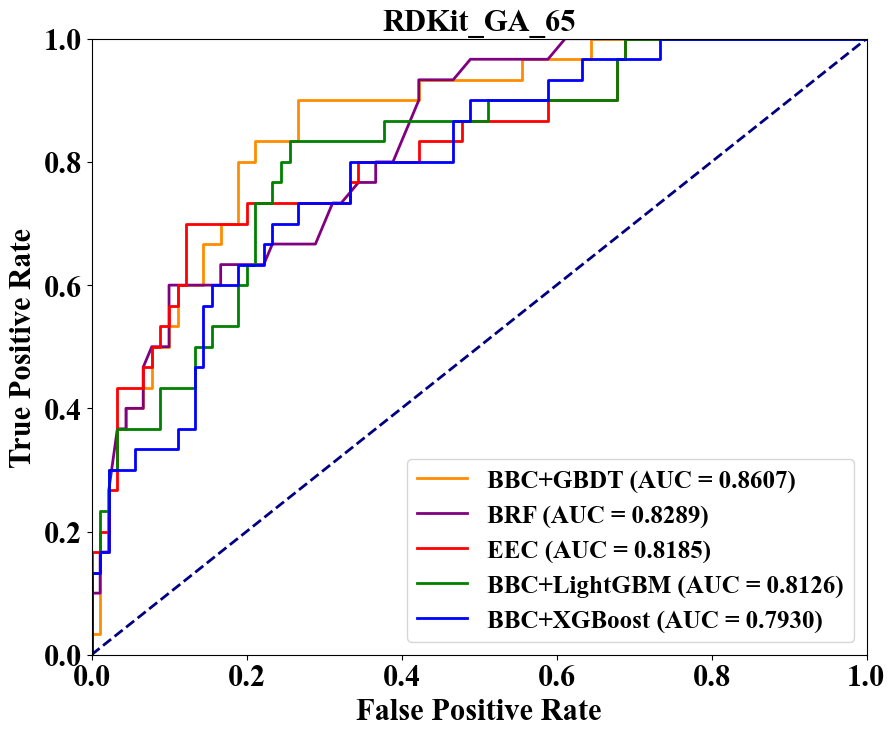

In [41]:
"""
Model Comparison: ROC Curves for All Models
"""

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from matplotlib import rcParams

def plot_roc_curves(models, X_test, y_test, title="ROC Curves Comparison", save_path=None):
   """
   Plot ROC curves for multiple models

   Args:
       models: Dictionary of model name and fitted model object
       X_test: Test features
       y_test: Test labels
       title: Plot title
       save_path: Path to save the plot
   """
   # Set global font
   rcParams['font.family'] = 'Times New Roman'

   # Calculate ROC curves for each model
   roc_data = {}
   for name, model in models.items():
       y_pred_proba = model.predict_proba(X_test)[:, 1]
       fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
       roc_auc = auc(fpr, tpr)
       roc_data[name] = {
           'fpr': fpr,
           'tpr': tpr,
           'auc': roc_auc
       }

   # Sort models by AUC score
   sorted_models = sorted(roc_data.items(), key=lambda x: x[1]['auc'], reverse=True)

   # Define colors
   colors = ['darkorange', 'purple', 'red', 'green', 'blue']

   # Create plot
   plt.figure(figsize=(10, 8))

   # Plot ROC curve for each model
   for i, (name, data) in enumerate(sorted_models):
       plt.plot(
           data['fpr'],
           data['tpr'],
           color=colors[i],
           lw=2,
           label=f'{name} (AUC = {data["auc"]:.4f})'
       )

   # Plot random baseline
   plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

   # Set plot parameters
   plt.xlim([0.0, 1.0])
   plt.ylim([0.0, 1.0])
   plt.xlabel('False Positive Rate', fontsize=22, fontweight='bold')
   plt.ylabel('True Positive Rate', fontsize=22, fontweight='bold')
   plt.xticks(fontsize=22, fontweight='bold')
   plt.yticks(fontsize=22, fontweight='bold')
   plt.legend(loc="lower right", prop={'size': 18, 'weight': 'bold'})
   plt.title(title, fontsize=22, fontweight='bold')

   # Save plot
   if save_path:
       plt.savefig(save_path, dpi=300, bbox_inches='tight')

   plt.show()

# Create dictionary of models
models = {
   'BRF': model_brf,
   'EEC': model_eec,
   'BBC+XGBoost': model_xgb,
   'BBC+GBDT': model_gbc,
   'BBC+LightGBM': model_lgbm
}

# Plot ROC curves
plot_roc_curves(
   models,
   X_test_selected_df,
   Ytest,
   title='RDKit_GA_65',
   save_path='roc_curve_RDKit_GA_65.png'
)

In [42]:
!pip install shap

   ---------------------------------------- 0.0/545.1 kB ? eta -:--:--
   ------------------- -------------------- 262.1/545.1 kB ? eta -:--:--
   ---------------------------------------- 545.1/545.1 kB 2.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ------- -------------------------------- 0.5/2.8 MB 3.8 MB/s eta 0:00:01
   ------------------ --------------------- 1.3/2.8 MB 3.5 MB/s eta 0:00:01
   ---------------------- ----------------- 1.6/2.8 MB 2.7 MB/s eta 0:00:01
   ----------------------------- ---------- 2.1/2.8 MB 2.7 MB/s eta 0:00:01
   ------------------------------------- -- 2.6/2.8 MB 2.6 MB/s eta 0:00:01
   ---------------------------------------- 2.8/2.8 MB 2.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/30.3 MB ? eta -:--:--
   ---------------------------------------- 0.3/30.3 MB ? eta -:--:--
   ---------------------------------------- 0.3/30.3 MB ? eta -:--:--
   - ------------------------------------

In [ ]:
"""
6.Model Interpretability Analysis Based on Best Model (EasyEnsemble Classifier)
Using SHAP (SHapley Additive exPlanations) to analyze feature importance

Note: Due to the long computation time of SHAP values, we will load pre-computed
SHAP values to demonstrate the visualization of interpretability analysis.
"""

import shap
from imblearn.ensemble import EasyEnsembleClassifier

# Train the model
best_model_eec = EasyEnsembleClassifier(random_state=42)
best_model_eec.fit(X_train_selected_df, y_train)

# Create SHAP explainer
explainer = shap.KernelExplainer(
   best_model_eec.predict_proba,
   X_train_selected_df
)

# Calculate SHAP values for training set
shap_values = explainer.shap_values(
   X_train_selected_df,
   nsamples=477
)

Using 477 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/477 [00:00<?, ?it/s]

In [ ]:
"""
6.1 Load pre-computed SHAP values and create visualization of top 10 features
Combining bee swarm plot and feature importance bar plot with customized styling
"""

import matplotlib.pyplot as plt
import shap
import numpy as np
import pickle


# Load pre-computed SHAP values
with open('shap_values_train.pkl', 'rb') as f:
   shap_values = pickle.load(f)

# Get feature names from selected features
feature_names = selected_feature_names  # Using previously stored feature names

# Select SHAP values for positive class (class 1)
shap_values_class_1 = shap_values[:, :, 1]


# Calculate feature importance and get top 10 features
feature_importance = np.mean(np.abs(shap_values_class_1), axis=0)
top10_indices = np.argsort(feature_importance)[-10:][::-1]
top10_features = selected_feature_names[top10_indices]
shap_values_class_1_top10 = shap_values_class_1[:, top10_indices]
X_train_selected_top10 = X_train_selected_df.iloc[:, top10_indices]

# Create main figure
fig, ax1 = plt.subplots(figsize=(10, 4), dpi=300)

# Draw bee swarm plot with color bar
shap.summary_plot(
   shap_values_class_1_top10,
   X_train_selected_top10,
   feature_names=top10_features,
   plot_type="dot",
   cmap='coolwarm',
   show=False,
   color_bar=True
)

# Adjust plot position
plt.gca().set_position([0.2, 0.4, 0.5, 0.65])

# Get shared y-axis and create second axis
ax1 = plt.gca()
ax2 = ax1.twiny()

# Draw feature importance bar plot
shap.summary_plot(
   shap_values_class_1_top10,
   X_train_selected_top10,
   feature_names=top10_features,
   plot_type="bar",
   show=False
)
plt.gca().set_position([0.2, 0.3, 0.5, 0.65])

# Add horizontal line and adjust bar transparency
ax2.axhline(y=10, color='gray', linestyle='-', linewidth=1)
for bar in ax2.patches:
   bar.set_alpha(0.2)

# Set axis labels and properties
ax1.set_xlabel('Shapley Value Contribution (Bee Swarm)', fontsize=12)
ax2.set_xlabel('Mean Shapley Value (Feature Importance)', fontsize=12)
ax1.set_ylabel('Features', fontsize=12)

# Adjust tick parameters
ax1.tick_params(axis='both', labelsize=16)
ax2.tick_params(axis='both', labelsize=16)

# Position top x-axis
ax2.xaxis.set_label_position('top')
ax2.xaxis.tick_top()

# Adjust legends if present
if ax1.get_legend():
   ax1.legend(prop={'size': 12})
if ax2.get_legend():
   ax2.legend(prop={'size': 12})

plt.tight_layout()

# Save high-resolution plot
plt.savefig("SHAP_combined_with_top_line_corrected_train_top10.png",
           format='png',
           bbox_inches='tight')
plt.show()

In [ ]:
"""
6.2 SHAP Dependence Plot Analysis
Creating dependence plots for top 10 features with original scale values
"""

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.optimize import fsolve
import joblib
from sklearn.preprocessing import StandardScaler
from typing import List, Union
import pandas as pd

import warnings
warnings.filterwarnings('ignore', category=RuntimeWarning, module='scipy.optimize')

# 1. First standardize the original features
scaler = StandardScaler()
X_train_std = pd.DataFrame(
    scaler.fit_transform(Xtrain),
    columns=Xtrain.columns,
    index=Xtrain.index
)

# 2. Get original feature names
original_feature_names = list(Xtrain.columns)

def plot_shap_dependence(
    feature_list: List[str],
    X_train_selected: np.ndarray,
    shap_values_array: np.ndarray,
    scaler: StandardScaler,
    feature_names: Union[List[str], pd.Index],
    original_feature_names: List[str],
    file_name: str = "SHAP_Dependence_Plots.png",
    fig_size: tuple = (25, 10),
    font_size: int = 22,
    dpi: int = 600
) -> None:
    """
    Create SHAP dependence plots for specified features, showing original (unscaled) feature values.
    """
    # Convert feature_names to list if it's an Index
    feature_names = list(feature_names)

    # Create subplot grid
    fig, axs = plt.subplots(2, 5, figsize=fig_size, dpi=dpi)
    plt.subplots_adjust(hspace=0.4, wspace=0.4)

    # Process each feature
    for i, feature in enumerate(feature_list):
        # Get current subplot
        ax = axs[i // 5, i % 5]

        # Get the index of the feature in both selected and original features
        selected_idx = feature_names.index(feature)
        original_idx = original_feature_names.index(feature)

        # Get scaled feature values
        scaled_values = X_train_selected[:, selected_idx]

        # Create dummy array with size of original features
        dummy_X = np.zeros((len(scaled_values), len(original_feature_names)))
        dummy_X[:, original_idx] = scaled_values

        # Convert to original scale using the scaler
        original_feature_values = scaler.inverse_transform(dummy_X)[:, original_idx]
        feature_shap_values = shap_values_array[:, selected_idx]

        # Create scatter plot
        ax.scatter(
            original_feature_values,
            feature_shap_values,
            s=10,
            color='deepskyblue',
            alpha=0.6
        )

        # Add LOWESS regression line
        lowess_plot = sns.regplot(
            x=original_feature_values,
            y=feature_shap_values,
            scatter=False,
            lowess=True,
            color='lightcoral',
            ax=ax
        )

        # Get LOWESS line data
        line = lowess_plot.get_lines()[0]
        x_fit = line.get_xdata()
        y_fit = line.get_ydata()

        # Find zero crossings
        def find_zero_crossings(x_fit, y_fit):
            crossings = []
            for j in range(1, len(y_fit)):
                if (y_fit[j-1] < 0 and y_fit[j] > 0) or (y_fit[j-1] > 0 and y_fit[j] < 0):
                    if feature == 'NumAliphaticRings':
                        crossings.append(3)
                    else:
                        crossing = fsolve(lambda x: np.interp(x, x_fit, y_fit), x_fit[j])[0]
                        crossings.append(crossing)
            return crossings

        # Add zero crossing lines and annotations
        x_intercepts = find_zero_crossings(x_fit, y_fit)
        for x_intercept in x_intercepts:
            ax.axvline(x=x_intercept, color='blue', linestyle='--', alpha=0.5)
            ax.text(
                x_intercept,
                0.01,
                f'{x_intercept:.2f}',
                color='black',
                fontsize=font_size,
                verticalalignment='bottom',
                fontweight='bold',
                fontname='Times New Roman'
            )

        # Add horizontal zero line
        ax.axhline(y=0, color='black', linestyle='-.', linewidth=1, alpha=0.5)

        # Set labels
        ax.set_xlabel(
            feature,
            fontsize=font_size,
            fontweight='bold',
            fontname='Times New Roman'
        )
        ax.set_ylabel(
            'SHAP value',
            fontsize=font_size,
            fontweight='bold',
            fontname='Times New Roman'
        )

        # Style tick labels
        for label in ax.get_xticklabels() + ax.get_yticklabels():
            label.set_fontname('Times New Roman')
            label.set_fontweight('bold')
            label.set_fontsize(font_size)

        # Remove top and right spines
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

    # Save and display plot
    plt.savefig(file_name, format='png', bbox_inches='tight')
    plt.show()

# Use the function
# Your top 10 features for visualization
feature_list = [
    'SlogP_VSA10', 'PEOE_VSA9', 'SMR_VSA10', 'EState_VSA1', 'NumAliphaticRings',
    'BalabanJ', 'PEOE_VSA6', 'PEOE_VSA7', 'SMR_VSA5', 'EState_VSA4'
]

# Create the plots
plot_shap_dependence(
    feature_list=feature_list,
    X_train_selected=X_train_selected,  # Selected features array
    shap_values_array=shap_values_class_1,
    scaler=scaler,
    feature_names=selected_feature_names,  # Names of selected features
    original_feature_names=original_feature_names,  # From X_train.columns
    file_name="SHAP_Dependence_Plots_with_annotations.png"
)

In [ ]:
"""
6. Model Interpretability Analysis Based on Best Model (EasyEnsemble Classifier)
Using SHAP (SHapley Additive exPlanations) to analyze feature importance

Note: Due to the long computation time of SHAP values, we will load pre-computed
SHAP values to demonstrate the visualization of interpretability analysis.
"""

import shap

# Create SHAP explainer
explainer = shap.KernelExplainer(
   model_eec.predict_proba, # Changed from best_model_eec to model_eec
   X_train_selected_df
)

# Calculate SHAP values for training set
shap_values = explainer.shap_values(
   X_train_selected_df,
   nsamples=477
)

In [ ]:
import torch
torch.cuda.is_available()


In [ ]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')


In [ ]:
!nvidia-smi
